In [15]:
import numpy as np  
import os
from glob import glob
from matplotlib import pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

height = 100
width = 100

def imread_gray(file):
    return cv2.imread(file, cv2.IMREAD_GRAYSCALE)

def resize(img):
    return cv2.resize(img, (height, width))

os.chdir("C:/Users/surdoot/Python/Covid Detection with x-ray/COVID")#dataset source : https://www.kaggle.com/ahmadalmahsiri/covid19-chest-xray
covid_data = glob("*")
covid_data = list(map(imread_gray, covid_data))
covid_data = list(map(resize, covid_data))

os.chdir("C:/Users/surdoot/Python/Covid Detection with x-ray/Normal")#dataset source : https://www.kaggle.com/ahmadalmahsiri/covid19-chest-xray
normal_data = glob("*")
normal_data = list(map(imread_gray, normal_data))
normal_data = list(map(resize, normal_data))

covid_len = len(covid_data)
normal_len = len(normal_data)

covid_data = np.array(covid_data)
normal_data = np.array(normal_data)

x = np.concatenate((covid_data, normal_data), axis = 0)
y = np.concatenate((np.ones(covid_len), np.zeros(normal_len)), axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True)

model = tf.keras.Sequential()

model.add(Conv2D(input_shape = (height, width, 1), kernel_size = (10, 10),
                filters = 16, activation='relu'))
model.add(Conv2D(kernel_size = (5, 5), filters = 32, 
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
#model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

detection = model.fit(x_train, y_train, batch_size = 10, epochs = 30, 
        validation_data = (x_test, y_test))

Epoch 1/30
178/178 [==============================] - 22s 120ms/step - loss: 7.7440 - accuracy: 0.8853 - val_loss: 0.1489 - val_accuracy: 0.9528
Epoch 2/30
178/178 [==============================] - 21s 120ms/step - loss: 0.1738 - accuracy: 0.9460 - val_loss: 0.1322 - val_accuracy: 0.9594
Epoch 3/30
178/178 [==============================] - 22s 122ms/step - loss: 0.1305 - accuracy: 0.9601 - val_loss: 0.1351 - val_accuracy: 0.9594
Epoch 4/30
178/178 [==============================] - 21s 119ms/step - loss: 0.1002 - accuracy: 0.9713 - val_loss: 0.1472 - val_accuracy: 0.9463
Epoch 5/30
178/178 [==============================] - 21s 119ms/step - loss: 0.0808 - accuracy: 0.9792 - val_loss: 0.1565 - val_accuracy: 0.9567
Epoch 6/30
178/178 [==============================] - 22s 121ms/step - loss: 0.1026 - accuracy: 0.9753 - val_loss: 0.1453 - val_accuracy: 0.9541
Epoch 7/30
178/178 [==============================] - 21s 119ms/step - loss: 0.0957 - accuracy: 0.9781 - val_loss: 0.2449 - val_ac

In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 96, 96, 16)        416       
                                                                 
 conv2d_9 (Conv2D)           (None, 92, 92, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 46, 46, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 67712)             0         
                                                                 
 dense_13 (Dense)            (None, 256)               17334528  
                                                      

In [23]:
history.history['accuracy'][:13]

[0.8852643370628357,
 0.9460067749023438,
 0.9600675106048584,
 0.9713160991668701,
 0.9791901111602783,
 0.9752531051635742,
 0.9780652523040771,
 0.976940393447876,
 0.9791901111602783,
 0.9842519760131836,
 0.9938132762908936,
 0.9955005645751953,
 0.9971878528594971]

1.1352643370628357
1.1960067749023438
1.2100675106048584
1.2213160991668701
1.2291901111602783
1.2252531051635742
1.2280652523040771
1.226940393447876
1.2291901111602783
1.2342519760131836
1.2438132762908936
1.2455005645751953
1.247187852859497


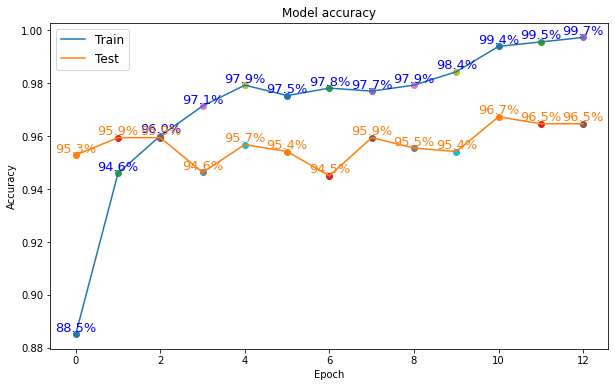

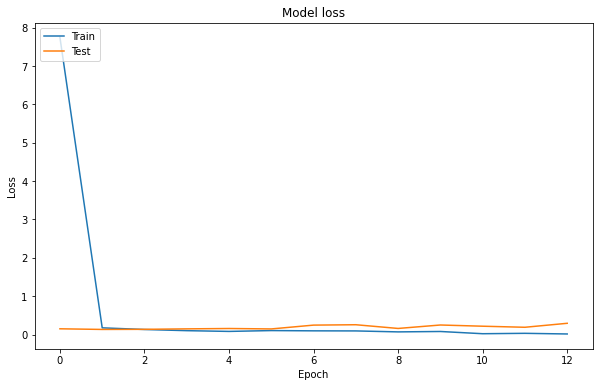

In [68]:
history = detection

# Accuracy
plt.figure(figsize=(10,6))
for i in range(len(history.history['accuracy'][:13])):
    height = history.history['accuracy'][i]
    print(height + 0.25)
    plt.text(i, float(height), '%.1f' %(height*100-0.01) + "%", ha='center', va='bottom', size = 13, color = 'blue')
    
for i in range(len(history.history['val_accuracy'][:13])):
    height = history.history['val_accuracy'][i]
    plt.text(i, float(height), '%.1f' %(height*100) + "%", ha='center', va='bottom', size = 13, color = 'tab:orange')

plt.plot(history.history['accuracy'][:13])
plt.plot(history.history['val_accuracy'][:13])

for i in range(len(history.history['val_accuracy'][:13])):
    plt.scatter(i, history.history['accuracy'][i])
    plt.scatter(i, history.history['val_accuracy'][i])

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left', fontsize = 12)
plt.show()


# Loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'][:13])
plt.plot(history.history['val_loss'][:13])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()